<a href="https://colab.research.google.com/github/IslombekTurakulov/NotebookWorks/blob/main/TurakulovIslombek_Calculus_18_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy
from sympy import S, symbols, Function, dsolve, solveset, linsolve, integrate, diff, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy import latex
import matplotlib.pyplot as plt

## Занятие 18
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
### Задача 1
Решить ОДУ $3y''+5y'-2y=0$ по формуле из файла с примерами и с помощью dsolve.

In [2]:
from sympy.abc import x
y = Function('y')
dsolve(3*y(x).diff(x, 2) + 5*y(x).diff(x) + -2*y(x), y(x))

Eq(y(x), C1*exp(-2*x) + C2*exp(x/3))

### Задача 2.
Решить задачу Коши:
$$
\left\{
\begin{matrix}
9y''+3y'+y=0\\
y(0)=0\\
y'(0)=2\sqrt3
\end{matrix}
\right.
$$
##### Указание.
Решить с помощью dsolve, затем составить словарь символов решения, ключи - 'x', 'C1', 'C2', а значения - соответствующие элементы из множества  ХХХ.rhs.free_symbols, решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия.

In [3]:
from sympy.abc import x
y = Function('y')
sol = dsolve(y(x).diff(x, 2) - 4*y(x).diff(x) + 4*y(x), y(x))
display(sol)

Eq(y(x), (C1 + C2*x)*exp(2*x))

In [4]:
dy0 = 0
d2y0 = 2*3**S.Half
sym_dict = {str(item): item for item in sol.rhs.free_symbols}
res = linsolve([sympy.Eq(sol.rhs.diff(x).subs(x, 0), dy0), sympy.Eq(sol.rhs.diff(x, 2).subs(x, 0), d2y0)],
         sym_dict['C1'], sym_dict['C2'])
c1, c2 = list(res)[0]

Text(30, 50, '$\\frac{d}{d x} y{\\left(x \\right)} = 0$,\n$\\frac{d^{2}}{d x^{2}} y{\\left(x \\right)} = 2 \\sqrt{3}$,\n$x = 0$')

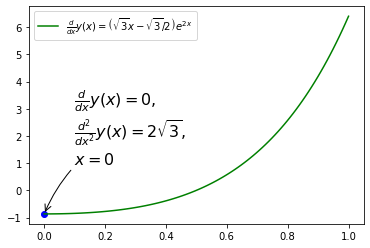

In [5]:
right = sol.rhs.subs({sym_dict['C1']:c1, sym_dict['C2']:c2})
def y(x):
  return (c1 + c2*x)*np.exp(2*x)
y_abstract = Function('y')(x)
X = np.linspace(0, 1, 100)
label1 = latex(sympy.Eq(y_abstract.diff(x), right), mode = 'inline')
plt.plot(X, y(X), color = 'green', label = label1)
plt.legend()

plt.scatter([0,], [y(0), ], color = 'blue')

plt.annotate(latex(sympy.Eq(diff(y_abstract, x), dy0), mode='inline') 
  +	',\n' + latex(sympy.Eq(diff(y_abstract, x, 2), d2y0), mode='inline')
  +	',\n' + latex(sympy.Eq(x, 0), mode='inline'),
  xy=(0, y(0)), xycoords='data',
  xytext=(30, +50), textcoords='offset points', 
  fontsize=16, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

### Индивидуальное задание
Решить с помощью dsolve:
$$
y''' + y'' + y' + y = (9x^2 + 4x -3)e^{-x}.
$$
Построить график $y(x)$ при начальных условиях $y(0) = -3$, $y'(0) = -1$, $y''(0) = -3$.

In [6]:
from sympy.abc import x
y = Function('y')
sol = dsolve(y(x).diff(x, 3) + y(x).diff(x, 2) + y(x).diff(x) + y(x) - (9*x**2 + 4*x - 3)*sympy.exp(-x), y(x))
display(sol)

Eq(y(x), C2*sin(x) + C3*cos(x) + (C1 + 3*x**3/2 + 11*x**2/2 + 5*x)*exp(-x))

In [7]:
dy0 = -3
d2y0 = -1
d3y0 = -3
sym_dict = {str(item): item for item in sol.rhs.free_symbols}

In [8]:
res = linsolve([sympy.Eq(sol.rhs.diff(x).subs(x, 0), dy0), 
                sympy.Eq(sol.rhs.diff(x, 2).subs(x, 0), d2y0),
                sympy.Eq(sol.rhs.diff(x, 3).subs(x, 0), d3y0)],
         sym_dict['C1'], sym_dict['C2'], sym_dict['C3'])

In [9]:
c1, c2, c3 = list(res)[0]

Text(30, 50, '$\\frac{d}{d x} y{\\left(x \\right)} = -3$,\n$\\frac{d^{2}}{d x^{2}} y{\\left(x \\right)} = -1$,\n$\\frac{d^{3}}{d x^{3}} y{\\left(x \\right)} = -3$,\n$x = 0$')

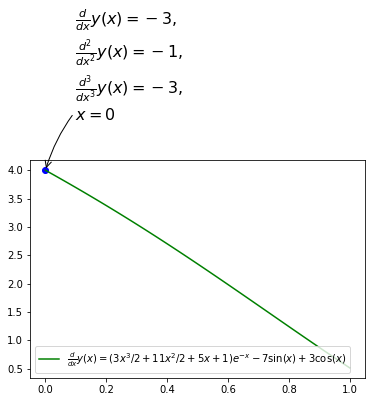

In [13]:
right = sol.rhs.subs({sym_dict['C1']:c1, sym_dict['C2']:c2, sym_dict['C3']:c3})
def y(x):
  return c1*np.exp(-x) + c2*np.sin(x) + c3*np.cos(x) + (3*x**3 + 11*x**2+ 10*x)*np.exp(-x)/2
y_abstract = Function('y')(x)
X = np.linspace(0, 1, 100)
label1 = latex(sympy.Eq(y_abstract.diff(x), right), mode = 'inline')
plt.plot(X, y(X), color = 'green', label = label1)
plt.legend()

plt.scatter([0,], [y(0), ], color = 'blue')

plt.annotate(latex(sympy.Eq(diff(y_abstract, x), dy0), mode='inline') 
  +	',\n' + latex(sympy.Eq(diff(y_abstract, x, 2), d2y0), mode='inline')
    +	',\n' + latex(sympy.Eq(diff(y_abstract, x, 3), d3y0), mode='inline')
  +	',\n' + latex(sympy.Eq(x, 0), mode='inline'),
  xy=(0, y(0)), xycoords='data',
  xytext=(30, +50), textcoords='offset points', 
  fontsize=16, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))